In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis: Climate Data

In [10]:
prism = pd.read_csv("https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Cleaned%20Data/prism.csv")
prism.head()

,Unnamed: 0,ppt (inches),tmin (degrees F),tmean (degrees F),tmax (degrees F),tdmean (degrees F),vpdmin (hPa),vpdmax (hPa),County,year,month
0,0,2.00,20.1,26.7,33.2,21.2,0.45,1.93,Adams,1895,1
1,1,0.38,28.4,36.3,44.2,25.7,0.78,4.76,Adams,1895,2
2,2,0.38,28.5,40.0,51.5,26.4,0.90,7.99,Adams,1895,3
3,3,0.41,36.3,50.8,65.3,31.3,1.68,15.49,Adams,1895,4
4,4,0.91,41.6,55.3,69.0,37.0,1.78,17.02,Adams,1895,5


### Average Temps

In [11]:
print(prism["year"].max())
print(prism["year"].min())

2021
1895


#### Histograms

Text(0.5, 1.0, 'Distribution of Precipitation')

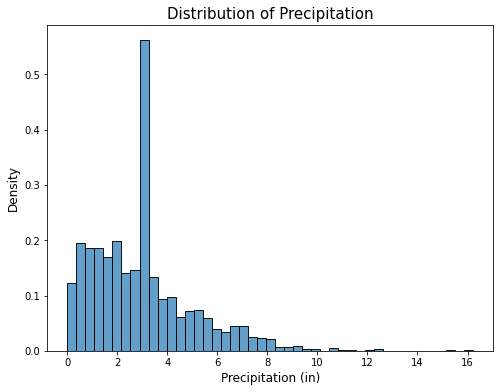

In [ ]:
plt.figure(figsize = (8, 6))

sns.histplot(data = precipitation, x = 'Precipitation (inches)', alpha = 0.7, stat = 'density')
plt.xlabel("Precipitation (in)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.title("Distribution of Precipitation", fontsize = 15)

Text(0.5, 1.0, 'Distribution of Average Temperature (1881 - 2022)')

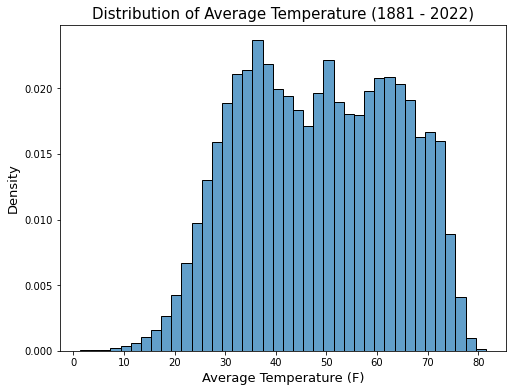

In [12]:
plt.figure(figsize = (8, 6))

sns.histplot(data = prism, x = "tmean (degrees F)",
             alpha = 0.7, stat = "density")
plt.xlabel("Average Temperature (F)", fontsize = 13)
plt.ylabel("Density", fontsize = 13)
plt.title("Distribution of Average Temperature (1881 - 2022)", fontsize = 15)

Text(0.5, 1.0, 'Distribution of Lowest Temperature')

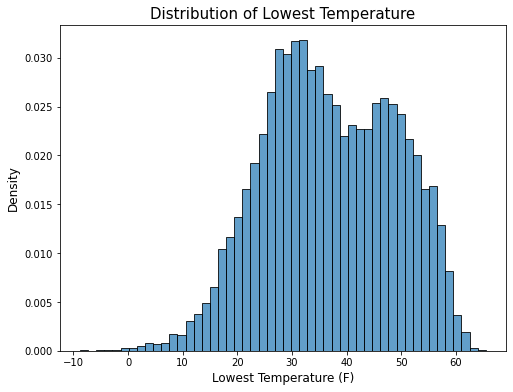

In [24]:
plt.figure(figsize = (8, 6))

sns.histplot(data = prism, x = 'tmin (degrees F)', alpha = 0.7,
             stat = 'density')
plt.xlabel("Lowest Temperature (F)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.title("Distribution of Lowest Temperature", fontsize = 15)

Text(0.5, 1.0, 'Distribution of Highest Temperature')

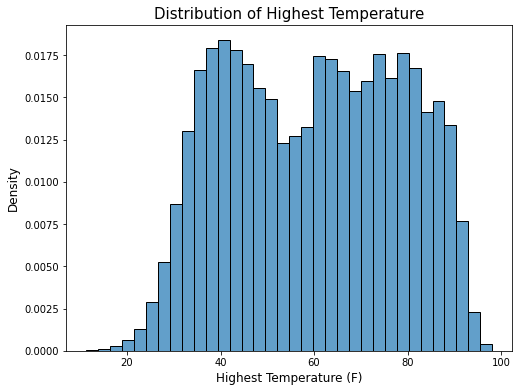

In [19]:
plt.figure(figsize = (8, 6))

sns.histplot(data = prism, x = 'tmax (degrees F)', alpha = 0.7,
             stat = 'density')
plt.xlabel("Highest Temperature (F)", fontsize = 12)
plt.ylabel("Density", fontsize = 12)
plt.title("Distribution of Highest Temperature", fontsize = 15)

#### Lineplots

In [6]:
years_1970 = prism.loc[prism['year'] >= 1970]
by_year_1970 = years_1970.groupby('year').mean()
by_year_1970['year'] = by_year_1970.index

Text(0.5, 1.0, 'Average Temperature by Year (1970 - 2022)')

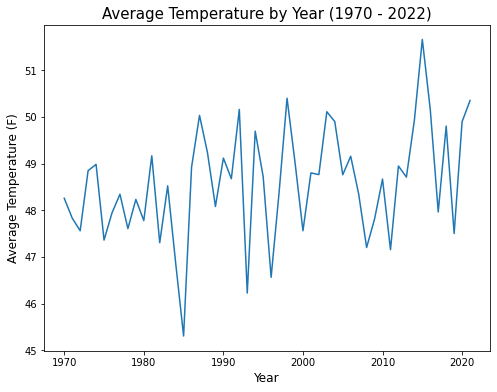

In [7]:
# mean temp
plt.figure(figsize = (8, 6))

by_year_1970['tmean (degrees F)'].plot()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Average Temperature (F)", fontsize = 12)
plt.title("Average Temperature by Year (1970 - 2022)", fontsize = 15)

Text(0.5, 1.0, 'Average Precipitation by Year (1970 - 2022)')

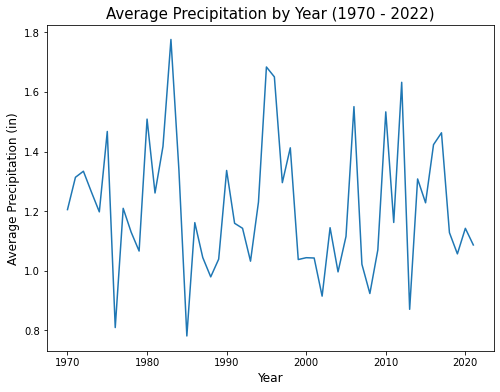

In [8]:
# precipitation
plt.figure(figsize = (8, 6))
ppt_1970 = prism.loc[prism['year'] >= 1970]
ppt_year_1970 = ppt_1970.groupby('year').mean()
ppt_year_1970['year'] = ppt_year_1970.index

by_year_1970['ppt (inches)'].plot()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Average Precipitation (in)", fontsize = 12)
plt.title("Average Precipitation by Year (1970 - 2022)", fontsize = 15)

Text(0.5, 1.0, 'Mean Dew Point Temperature (F) (1970 - 2022)')

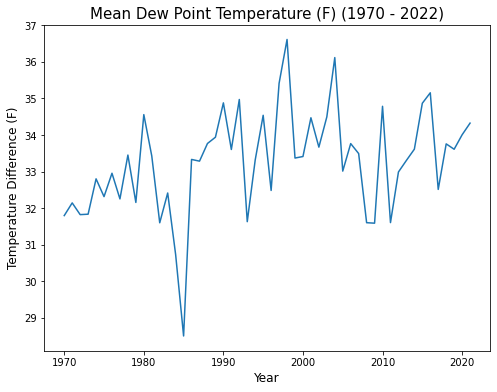

In [37]:
plt.figure(figsize = (8, 6))
td_1970 = prism.loc[prism['year'] >= 1970]
td_year = td_1970.groupby('year').mean()
td_year['year'] = td_year.index

td_year['tdmean (degrees F)'].plot()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Temperature Difference (F)", fontsize = 12)
plt.title("Mean Dew Point Temperature (F) (1970 - 2022)", fontsize = 15)

Text(0.5, 1.0, 'Mean of Highest, Average, and Lowest Temperature by Year')

<Figure size 576x432 with 0 Axes>

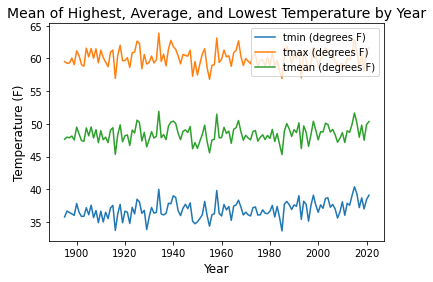

In [36]:
plt.figure(figsize = (8, 6))
prism_by_year = prism.groupby('year').mean()
prism_by_year['year'] = prism_by_year.index

prism_by_year[['tmin (degrees F)', 'tmax (degrees F)', 'tmean (degrees F)']].plot()
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Temperature (F)", fontsize = 12)
plt.title("Mean of Highest, Average, and Lowest Temperature by Year", fontsize = 14)

#### Boxplots

Text(0, 0.5, 'Year')

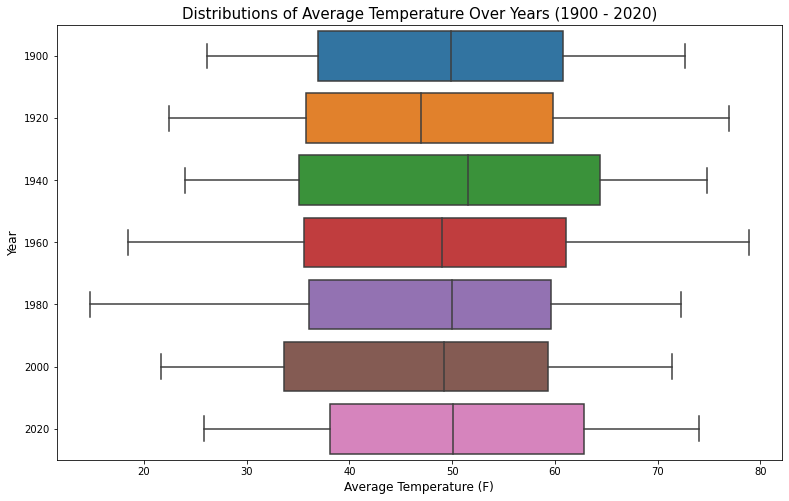

In [14]:
plt.figure(figsize = (13, 8))

sns.boxplot(data = prism[prism["year"].isin([1900, 1920, 1940, 1960, 1980, 2000, 2020])],
            x = "tmean (degrees F)", y = "year", orient = "h")
plt.title("Distributions of Average Temperature Over Years (1900 - 2020)", fontsize = 15)
plt.xlabel("Average Temperature (F)", fontsize = 12)
plt.ylabel("Year", fontsize = 12)

Text(0, 0.5, 'Year')

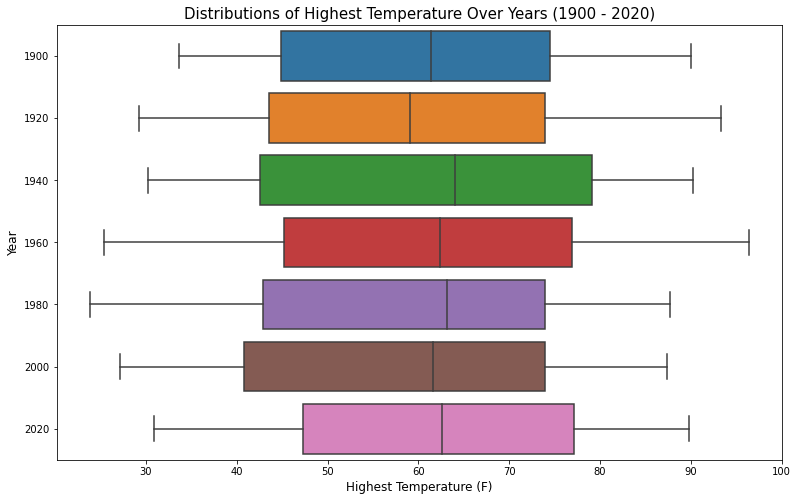

In [23]:
plt.figure(figsize = (13, 8))

sns.boxplot(data = prism[prism["year"].isin([1900, 1920, 1940, 1960, 1980, 2000, 2020])],
            x = "tmax (degrees F)", y = "year", orient = "h")
plt.title("Distributions of Highest Temperature Over Years (1900 - 2020)", fontsize = 15)
plt.xlabel("Highest Temperature (F)", fontsize = 12)
plt.ylabel("Year", fontsize = 12)

Text(0, 0.5, 'Year')

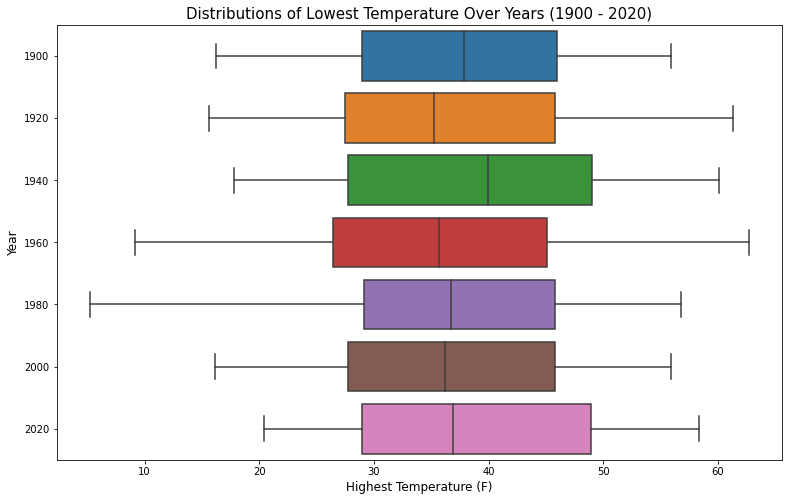

In [25]:
plt.figure(figsize = (13, 8))

sns.boxplot(data = prism[prism["year"].isin([1900, 1920, 1940, 1960, 1980, 2000, 2020])],
            x = "tmin (degrees F)", y = "year", orient = "h")
plt.title("Distributions of Lowest Temperature Over Years (1900 - 2020)", fontsize = 15)
plt.xlabel("Highest Temperature (F)", fontsize = 12)
plt.ylabel("Year", fontsize = 12)

Text(0, 0.5, 'Year')

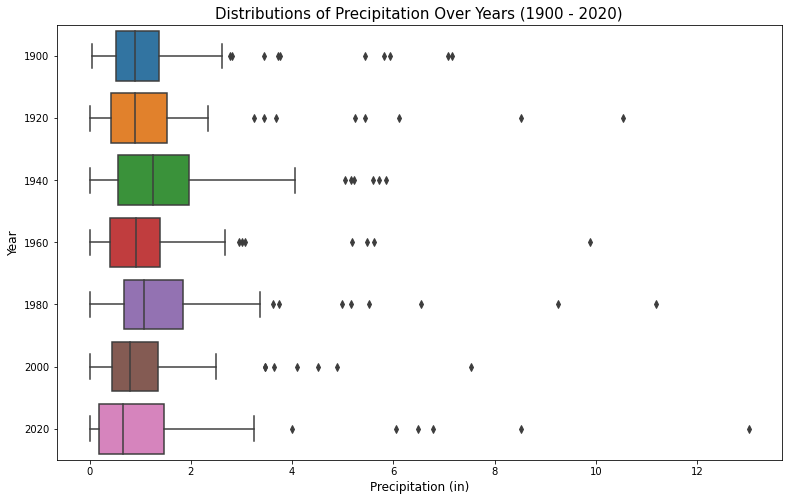

In [26]:
plt.figure(figsize = (13, 8))

sns.boxplot(data = prism[prism["year"].isin([1900, 1920, 1940, 1960, 1980, 2000, 2020])],
            x = "ppt (inches)", y = "year", orient = "h")
plt.title("Distributions of Precipitation Over Years (1900 - 2020)", fontsize = 15)
plt.xlabel("Precipitation (in)", fontsize = 12)
plt.ylabel("Year", fontsize = 12)